In [26]:
#!pip install yfinance pandas matplotlib seaborn

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the stock tickers and the date range
tickers = ['ADANIPOWER.NS', 'TATAPOWER.NS']
start_date = '2019-12-01'
end_date = '2022-12-31'

# Download the stock data
adani_power = yf.download(tickers[0], start=start_date, end=end_date)
tata_power = yf.download(tickers[1], start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# Calculate daily returns
adani_power['Daily Change'] = adani_power['Close'].pct_change()
tata_power['Daily Change'] = tata_power['Close'].pct_change()


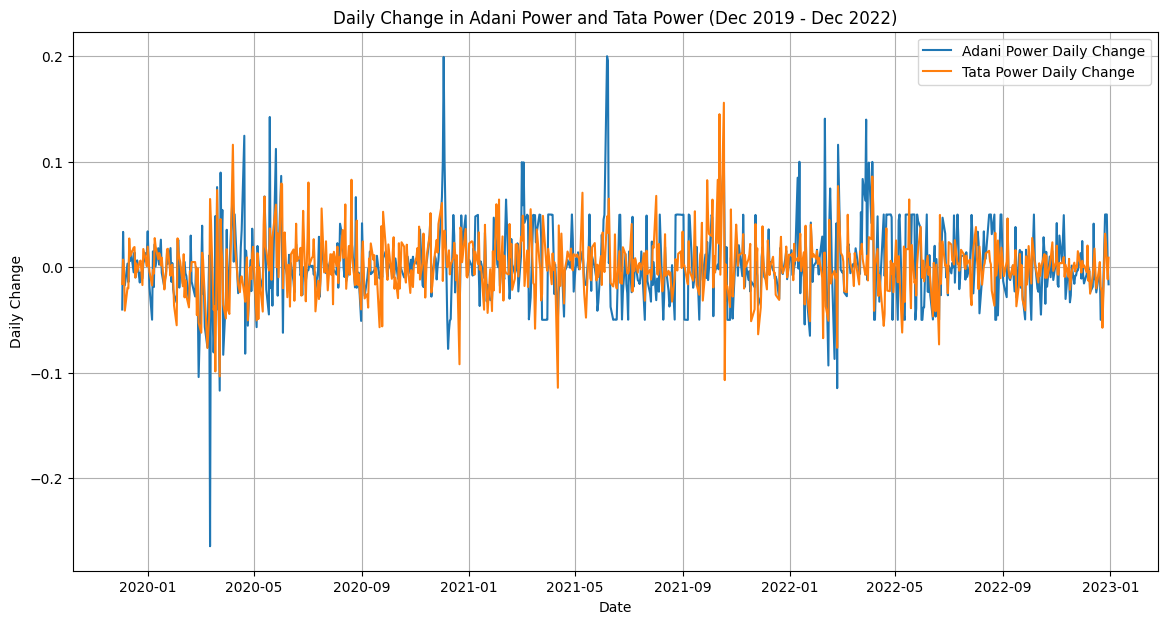

In [4]:
# Plotting daily change using line chart
plt.figure(figsize=(14, 7))
plt.plot(adani_power.index, adani_power['Daily Change'], label='Adani Power Daily Change')
plt.plot(tata_power.index, tata_power['Daily Change'], label='Tata Power Daily Change')
plt.title('Daily Change in Adani Power and Tata Power (Dec 2019 - Dec 2022)')
plt.xlabel('Date')
plt.ylabel('Daily Change')
plt.legend()
plt.grid(True)

### News

 - [Adani Power share price hits upper circuit](https://www.moneycontrol.com/news/business/stocks/adani-power-share-price-hits-upper-circuit-surges-over-230-in-9-months-6996601.html)

 - [Sensex hits 10% lower circuit, trading halted for 45 minutes](https://www.business-standard.com/article/markets/sensex-hits-10-lower-circuit-trading-halted-for-45-minutes-120032300237_1.html)

- [Stock Market Circuit Breakers](https://groww.in/p/stock-market-circuit-breakers)

    The October 1987 “Black Monday” crash of the US stock market caused insurmountable losses for a large number of investors. Post this incident, the circuit-breaker rule came into effect in the US stock market.

    As per this regulatory mechanism, benchmark indices can move only within a prescribed range. They cannot go above or below the stipulated upper and lower limits respectively. These limits are known as circuit-breakers, circuit filters, or simply, circuits. Circuit limits of individual stocks are commonly known as stock price bands. Upper circuits are ceiling prices while lower circuits are floor prices of stocks or indices.

    The Stock Market Circuit Breakers aim to restrict panic selling, curtail heavy stock accumulation, and prevent intense market volatilities. Circuit limits vary from market to market and from stock to stock.


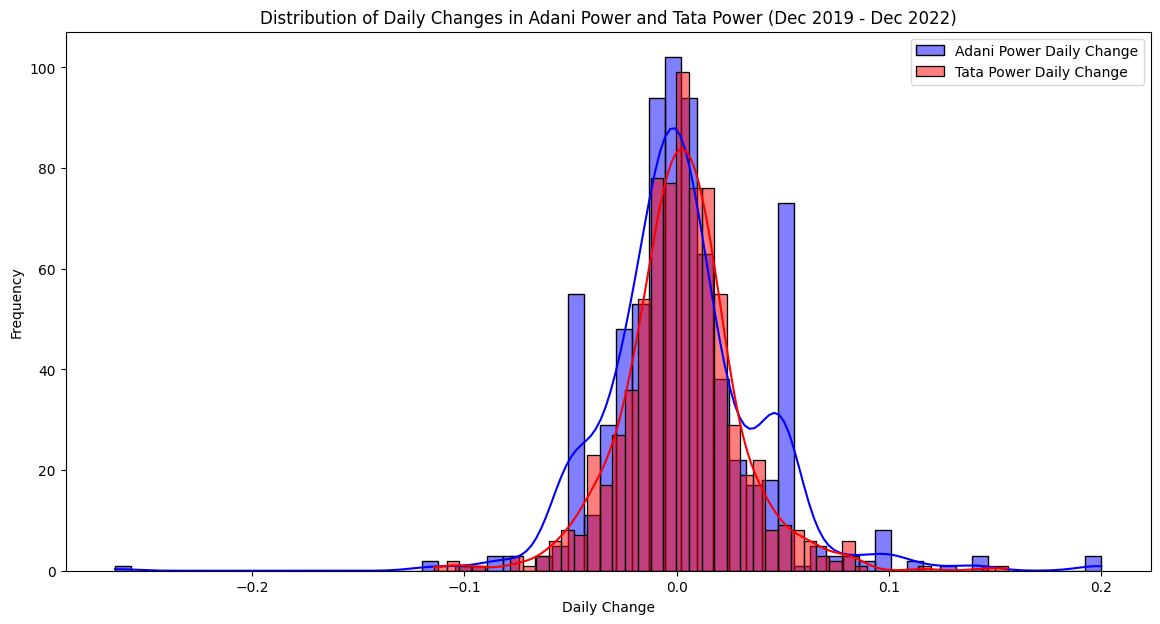

In [5]:
# Plotting daily change distribution using histogram
plt.figure(figsize=(14, 7))
sns.histplot(adani_power['Daily Change'].dropna(), color='blue', label='Adani Power Daily Change', kde=True)
sns.histplot(tata_power['Daily Change'].dropna(), color='red', label='Tata Power Daily Change', kde=True)
plt.title('Distribution of Daily Changes in Adani Power and Tata Power (Dec 2019 - Dec 2022)')
plt.xlabel('Daily Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [6]:
# Display the summary statistics for comparison
print("Adani Power Daily Change Statistics:\n", adani_power['Daily Change'].describe())
print("\nTata Power Daily Change Statistics:\n", tata_power['Daily Change'].describe())

Adani Power Daily Change Statistics:
 count    767.000000
mean       0.002744
std        0.037407
min       -0.264563
25%       -0.016612
50%        0.000000
75%        0.018551
max        0.200000
Name: Daily Change, dtype: float64

Tata Power Daily Change Statistics:
 count    767.000000
mean       0.002085
std        0.027759
min       -0.114313
25%       -0.012071
50%        0.002008
75%        0.015545
max        0.155885
Name: Daily Change, dtype: float64


In [7]:
from scipy import stats

In [23]:
stats.norm.interval(0.997, adani_power['Daily Change'].mean(), adani_power['Daily Change'].std())

(-0.10826918772904069, 0.11375658372671169)

In [24]:
stats.norm.interval(0.997, tata_power['Daily Change'].mean(), tata_power['Daily Change'].std())

(-0.08029621499673394, 0.08446626732860166)

In [25]:
adani_power[adani_power['Daily Change'] < -0.1082]

,Open,High,Low,Close,Adj Close,Volume,Daily Change
Date,,,,,,,
2020-03-12,37.950001,39.799999,29.700001,30.299999,30.299999,25002323,-0.264563
2020-03-23,26.150000,27.799999,25.299999,25.650000,25.650000,4609535,-0.117040
2022-02-24,112.550003,120.400002,108.699997,111.150002,111.150002,76143909,-0.114695
